In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

In [22]:
N = 4000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [23]:
kappa = 5
P = 10
T = 40

In [24]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)
x = bernouli_gaussian(N, rho)
SNR = 60

In [25]:
tmp1G = AMP(iidG.A, x, SNR)
tmp2G = D_AMP(iidG.A, x, SNR, P)
tmp3G = OAMP(iidG.A, x, SNR, iidG=True)
tmp4G = D_OAMP(iidG.A, x, SNR, P, iidG=True)

final mse: 0.03603954603466408


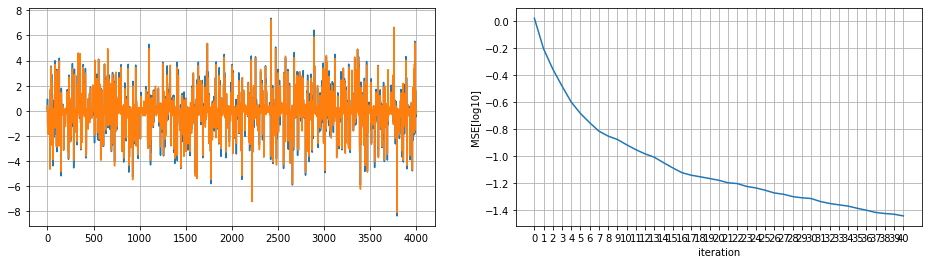

In [26]:
tmp1G.estimate(T=T)
tmp1G.result()

In [27]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2G.estimate(T=T, log=True)

N(P-1): 36000


Rp: 14700.0 	 F: 581 	 F\Rp: 3564
Total Communication Cost: 18264
Rp: 15660.0 	 F: 665 	 F\Rp: 3979
Total Communication Cost: 19639
Rp: 16099.0 	 F: 694 	 F\Rp: 4076
Total Communication Cost: 20175
Rp: 16462.0 	 F: 716 	 F\Rp: 4143
Total Communication Cost: 20605
Rp: 16729.0 	 F: 742 	 F\Rp: 4259
Total Communication Cost: 20988
Rp: 16969.0 	 F: 757 	 F\Rp: 4305
Total Communication Cost: 21274
Rp: 17228.0 	 F: 774 	 F\Rp: 4381
Total Communication Cost: 21609
Rp: 17570.0 	 F: 790 	 F\Rp: 4424
Total Communication Cost: 21994
Rp: 17880.0 	 F: 826 	 F\Rp: 4576
Total Communication Cost: 22456
Rp: 18187.0 	 F: 847 	 F\Rp: 4636
Total Communication Cost: 22823
Rp: 18476.0 	 F: 865 	 F\Rp: 4676
Total Communication Cost: 23152
Rp: 18799.0 	 F: 890 	 F\Rp: 4772
Total Communication Cost: 23571
Rp: 19120.0 	 F: 917 	 F\Rp: 4872
Total Communication Cost: 23992
Rp: 19479.0 	 F: 950 	 F\Rp: 4961
Total Communication Cost: 24440
Rp: 19877.0 	 F: 974 	 F\Rp: 5014
Total Communication Cost: 

final mse: 0.030883195403493307


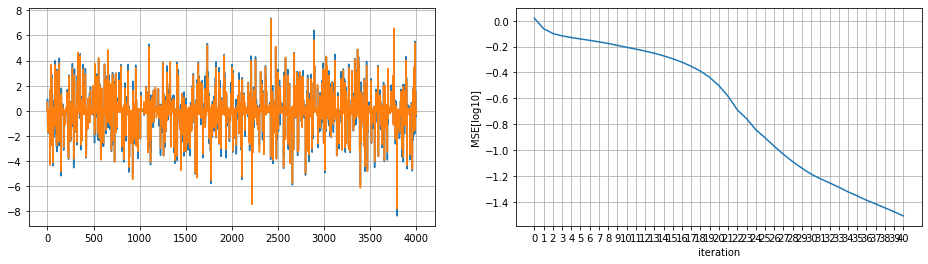

In [28]:
tmp2G.result()

final mse: 0.005681232757058409


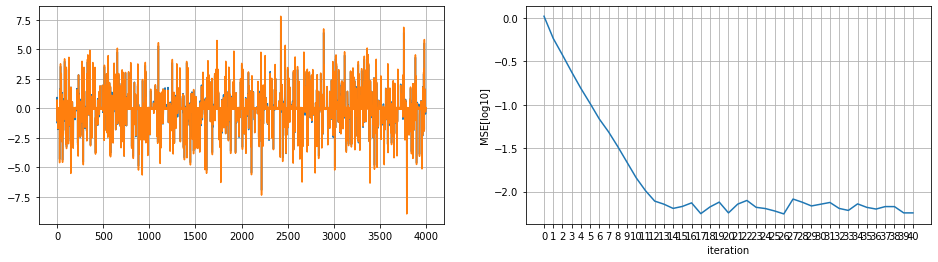

In [29]:
tmp3G.estimate(T=T)
tmp3G.result()

In [30]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4G.estimate(T=T, C=1.85, log=True)

N(P-1): 36000


Rp: 23836.0 	 F: 431 	 F\Rp: 1960
Total Communication Cost: 25796
Rp: 24038.0 	 F: 573 	 F\Rp: 2526
Total Communication Cost: 26564
Rp: 24140.0 	 F: 651 	 F\Rp: 2894
Total Communication Cost: 27034
Rp: 24368.0 	 F: 663 	 F\Rp: 2894
Total Communication Cost: 27262
Rp: 24607.0 	 F: 690 	 F\Rp: 2895
Total Communication Cost: 27502
Rp: 24794.0 	 F: 743 	 F\Rp: 3092
Total Communication Cost: 27886
Rp: 24977.0 	 F: 755 	 F\Rp: 3059
Total Communication Cost: 28036
Rp: 25205.0 	 F: 763 	 F\Rp: 3055
Total Communication Cost: 28260
Rp: 25427.0 	 F: 792 	 F\Rp: 3124
Total Communication Cost: 28551
Rp: 25693.0 	 F: 830 	 F\Rp: 3204
Total Communication Cost: 28897
Rp: 25826.0 	 F: 837 	 F\Rp: 3233
Total Communication Cost: 29059
Rp: 26016.0 	 F: 851 	 F\Rp: 3196
Total Communication Cost: 29212
Rp: 26265.0 	 F: 872 	 F\Rp: 3291
Total Communication Cost: 29556
Rp: 26510.0 	 F: 916 	 F\Rp: 3403
Total Communication Cost: 29913
Rp: 26747.0 	 F: 927 	 F\Rp: 3387
Total Communication Cost: 

final mse: 0.020921419926229975


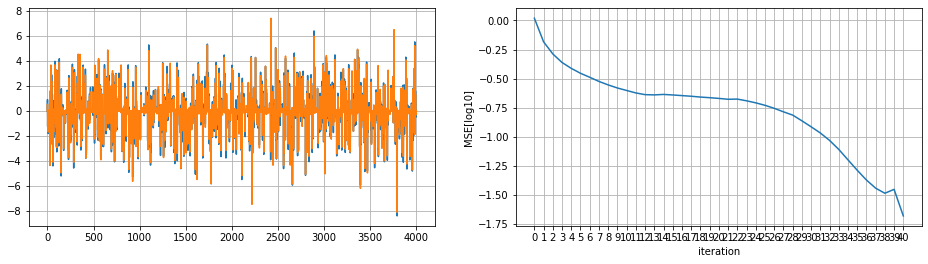

In [31]:
tmp4G.result()

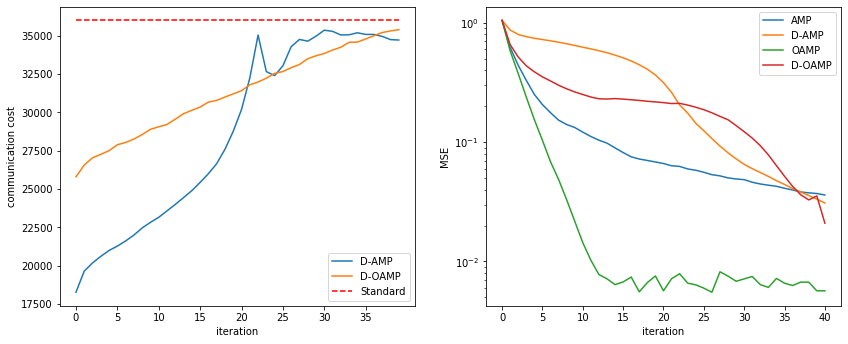

In [32]:
plt.figure(figsize=(14, 5.5))


t1 = np.arange(0, T, 1)

plt.subplot(121)
plt.xlabel('iteration')
plt.ylabel('communication cost')
plt.xticks(np.arange(0, T, 5))

standard = np.array([N * (P - 1) for _ in range(T)])

plt.plot(t1, tmp2G.communication_cost, label='D-AMP')
plt.plot(t1, tmp4G.communication_cost, label='D-OAMP')
plt.plot(t1, standard, ls='--', color='r', label='Standard')
plt.legend()


t2 = np.arange(0, T+1, 1)

plt.subplot(122)
plt.xlabel('iteration')
plt.ylabel('MSE')

plt.xticks(np.arange(0, T+1, 5))
plt.yscale('log')

plt.plot(t2, tmp1G.mse, label="AMP")
plt.plot(t2, tmp2G.mse, label="D-AMP")
plt.plot(t2, tmp3G.mse, label='OAMP')
plt.plot(t2, tmp4G.mse, label='D-OAMP')
plt.legend()

In [33]:
tmp1U = AMP(UniInv.A, x, SNR)
tmp2U = D_AMP(UniInv.A, x, SNR, P)
tmp3U = OAMP(UniInv.A, x, SNR)
tmp4U = D_OAMP(UniInv.A, x, SNR, P)

final mse: 1.1173919322335528e+78


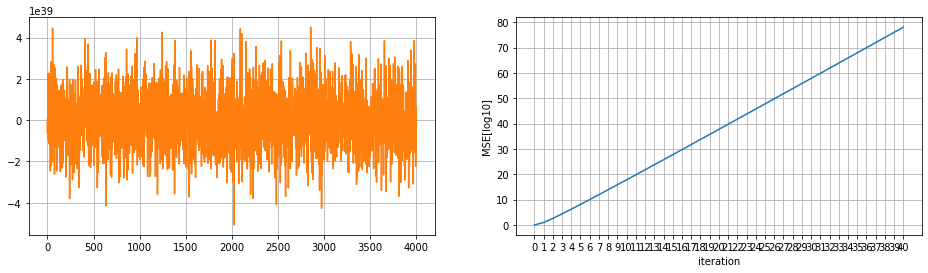

In [34]:
tmp1U.estimate(T=T)
tmp1U.result()

In [35]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2U.estimate(T=T, log=True)

N(P-1): 36000


Rp: 26383.0 	 F: 1613 	 F\Rp: 5750
Total Communication Cost: 32133
Rp: 24936.0 	 F: 1484 	 F\Rp: 5678
Total Communication Cost: 30614
Rp: 25786.0 	 F: 1472 	 F\Rp: 5346
Total Communication Cost: 31132
Rp: 25806.0 	 F: 1484 	 F\Rp: 5318
Total Communication Cost: 31124
Rp: 25981.0 	 F: 1497 	 F\Rp: 5374
Total Communication Cost: 31355
Rp: 26089.0 	 F: 1473 	 F\Rp: 5247
Total Communication Cost: 31336
Rp: 26226.0 	 F: 1458 	 F\Rp: 5104
Total Communication Cost: 31330
Rp: 26363.0 	 F: 1465 	 F\Rp: 5086
Total Communication Cost: 31449
Rp: 26479.0 	 F: 1467 	 F\Rp: 5088
Total Communication Cost: 31567
Rp: 26571.0 	 F: 1494 	 F\Rp: 5143
Total Communication Cost: 31714
Rp: 26674.0 	 F: 1496 	 F\Rp: 5117
Total Communication Cost: 31791
Rp: 26799.0 	 F: 1482 	 F\Rp: 5051
Total Communication Cost: 31850
Rp: 26868.0 	 F: 1474 	 F\Rp: 5050
Total Communication Cost: 31918
Rp: 26952.0 	 F: 1488 	 F\Rp: 5080
Total Communication Cost: 32032
Rp: 27038.0 	 F: 1485 	 F\Rp: 5108
Total Commu

final mse: 5.315902287707634e+63


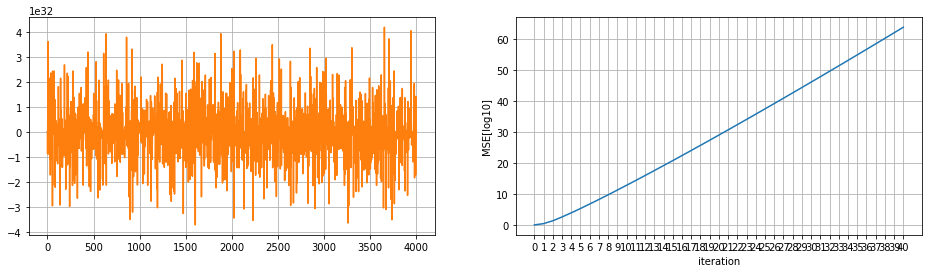

In [36]:
tmp2U.result()

final mse: 0.005928884116732347


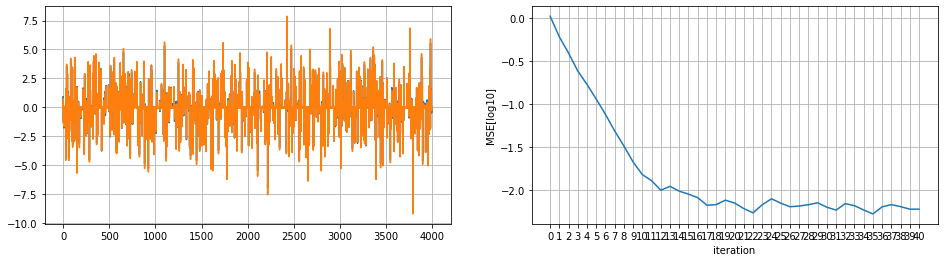

In [37]:
tmp3U.estimate(T=T)
tmp3U.result()

In [38]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4U.estimate(T=T, C=1.85, log=True)

N(P-1): 36000


Rp: 24431.0 	 F: 427 	 F\Rp: 1836
Total Communication Cost: 26267
Rp: 24644.0 	 F: 544 	 F\Rp: 2345
Total Communication Cost: 26989
Rp: 24849.0 	 F: 614 	 F\Rp: 2484
Total Communication Cost: 27333
Rp: 25044.0 	 F: 641 	 F\Rp: 2600
Total Communication Cost: 27644
Rp: 25340.0 	 F: 662 	 F\Rp: 2592
Total Communication Cost: 27932
Rp: 25416.0 	 F: 708 	 F\Rp: 2769
Total Communication Cost: 28185
Rp: 25631.0 	 F: 743 	 F\Rp: 2931
Total Communication Cost: 28562
Rp: 25834.0 	 F: 793 	 F\Rp: 3084
Total Communication Cost: 28918
Rp: 25954.0 	 F: 823 	 F\Rp: 3181
Total Communication Cost: 29135
Rp: 26068.0 	 F: 831 	 F\Rp: 3188
Total Communication Cost: 29256
Rp: 26204.0 	 F: 864 	 F\Rp: 3263
Total Communication Cost: 29467
Rp: 26398.0 	 F: 888 	 F\Rp: 3332
Total Communication Cost: 29730
Rp: 26705.0 	 F: 892 	 F\Rp: 3278
Total Communication Cost: 29983
Rp: 26806.0 	 F: 916 	 F\Rp: 3337
Total Communication Cost: 30143
Rp: 27120.0 	 F: 928 	 F\Rp: 3305
Total Communication Cost: 

final mse: 0.020054126423977123


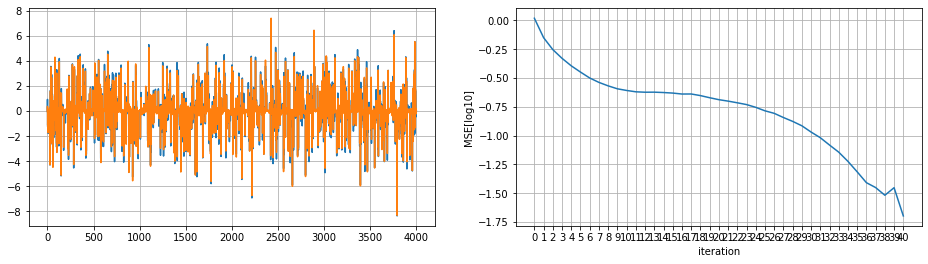

In [39]:
tmp4U.result()

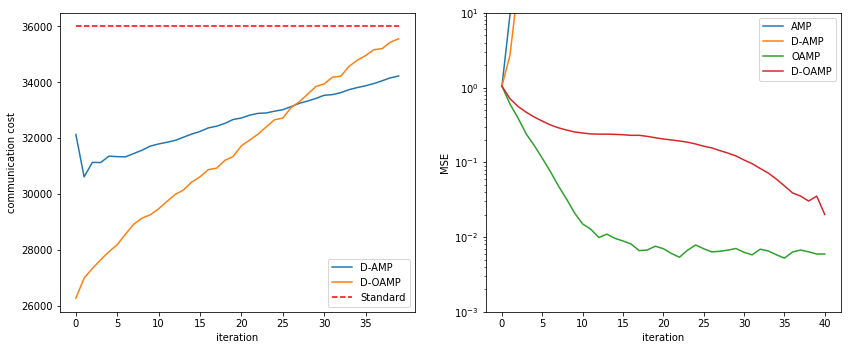

In [40]:
plt.figure(figsize=(14, 5.5))


t1 = np.arange(0, T, 1)

plt.subplot(121)
plt.xlabel('iteration')
plt.ylabel('communication cost')
plt.xticks(np.arange(0, T, 5))

standard = np.array([N * (P - 1) for _ in range(T)])

plt.plot(t1, tmp2U.communication_cost, label='D-AMP')
plt.plot(t1, tmp4U.communication_cost, label='D-OAMP')
plt.plot(t1, standard, ls='--', color='r', label='Standard')
plt.legend()


t2 = np.arange(0, T+1, 1)

plt.subplot(122)
plt.xlabel('iteration')
plt.ylabel('MSE')

plt.xticks(np.arange(0, T+1, 5))
plt.ylim(1e-3, 1e+1)
plt.yscale('log')

plt.plot(t2, tmp1U.mse, label="AMP")
plt.plot(t2, tmp2U.mse, label="D-AMP")
plt.plot(t2, tmp3U.mse, label='OAMP')
plt.plot(t2, tmp4U.mse, label='D-OAMP')
plt.legend()